# Binning in physt

In [1]:
# Necessary import evil
%matplotlib inline
from physt import histogram, binnings
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Some data
np.random.seed(42)

heights1 = np.random.normal(169, 10, 100000)
heights2 = np.random.normal(180, 6, 100000)
numbers = np.random.rand(100000)

## Ideal number of bins

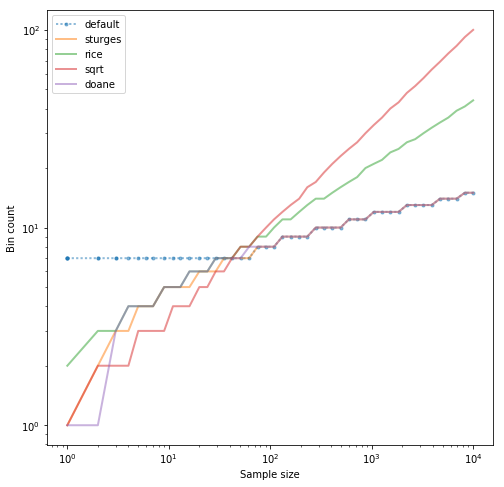

In [3]:
X = [int(x) for x in np.logspace(0, 4, 50)]

algos = binnings.bincount_methods
Ys = { algo: [] for algo in algos}

for x in X:
    ex_dataset = np.random.exponential(1, x)
    for algo in algos:
        Ys[algo].append(binnings.ideal_bin_count(ex_dataset, algo))

figure, axis = plt.subplots(figsize=(8, 8))
for algo in algos:
    if algo == "default":
        axis.plot(X, Ys[algo], ":.", label=algo, alpha=0.5, lw=2)
    else:
        axis.plot(X, Ys[algo], "-", label=algo, alpha=0.5, lw=2)
axis.set_xscale("log")
axis.set_yscale("log")
axis.set_xlabel("Sample size")
axis.set_ylabel("Bin count")
axis.legend(loc=2);

## Binning schemes

### Exponential binning

Uses numpy.logscale to create bins.

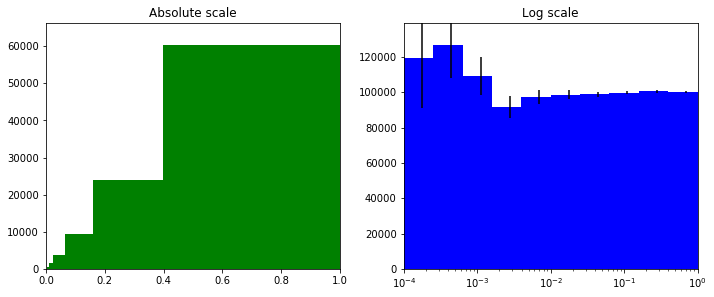

In [4]:
figure, axis = plt.subplots(1, 2, figsize=(10, 4))
hist1 = histogram(numbers, "exponential", 10, range=(0.0001, 1))
hist1.plot(color="green", ax=axis[0])
hist1.plot(density=True, errors=True, ax=axis[1])
axis[0].set_title("Absolute scale")
axis[1].set_title("Log scale")
axis[1].set_xscale("log");

###  Integer binning

Useful for integer values (or something you want to round to integers), creates bins of width=1 around integers (i.e. 0.5-1.5, ...)

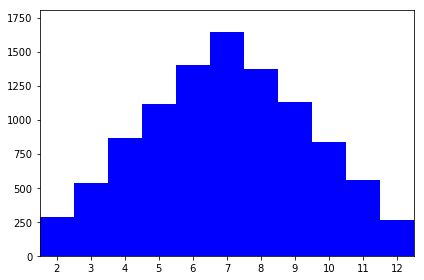

In [5]:
# Sum of two dice (should be triangle, right?)
dice = np.floor(np.random.rand(10000) * 6) + np.floor(np.random.rand(10000) * 6) + 2
histogram(dice, "integer").plot(ticks="center", density=True);

### Quantile-based binning

Based on quantiles, this binning results in all bins containing roughly the same amount 
of observances.

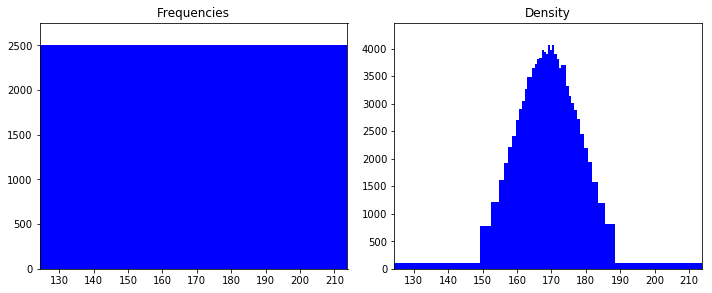

In [6]:
figure, axis = plt.subplots(1, 2, figsize=(10, 4))
# bins2 = binning.quantile_bins(heights1, 40)
hist2 = histogram(heights1, "quantile", 40)
hist2.plot(ax=axis[0]);
hist2.plot(density=True, ax=axis[1]);
axis[0].set_title("Frequencies")
axis[1].set_title("Density");

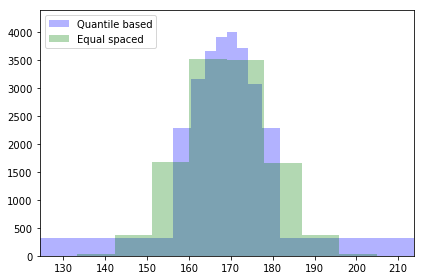

In [7]:
figure, axis = plt.subplots()

histogram(heights1, "quantile", 10).plot(alpha=0.3, density=True, ax=axis, label="Quantile based")
histogram(heights1, 10).plot(alpha=0.3, density=True, ax=axis, color="green", label="Equal spaced")
axis.legend(loc=2);

### Fixed-width bins

This binning is useful if you want "human-friendly" bin intervals.

Histogram1D(bins=(31,), total=100000, dtype=int64)

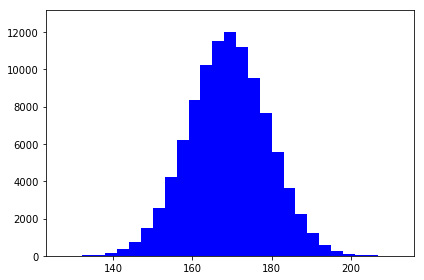

In [8]:
hist_fixed = histogram(heights1, "fixed_width", 3)
hist_fixed.plot()
hist_fixed

### "Human" bins

The width and alignment of bins is guessed from the data with an approximate number of bins as (optional) parameter.

Histogram1D(bins=(19,), total=100000, dtype=int64)

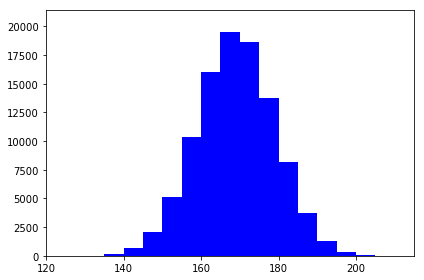

In [9]:
human = histogram(heights1, "human", 15)
human.plot()
human

### Astropy binning

Astropy includes its histogramming tools. If this package is available, we reuse its binning
methods. These include:

* Bayesian blocks
* Knuth
* Freedman
* Scott

See <http://docs.astropy.org/en/stable/visualization/histogram.html> for more details.

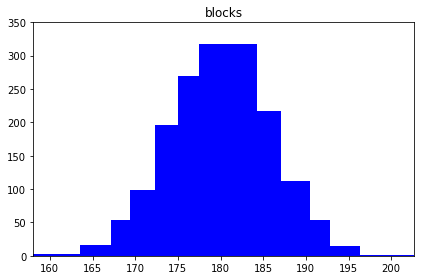

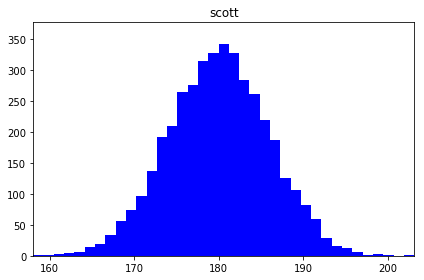

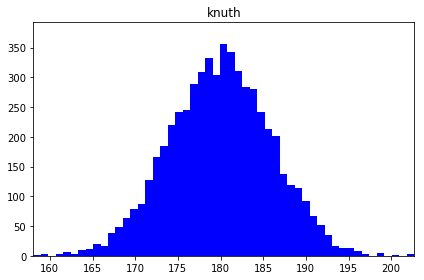

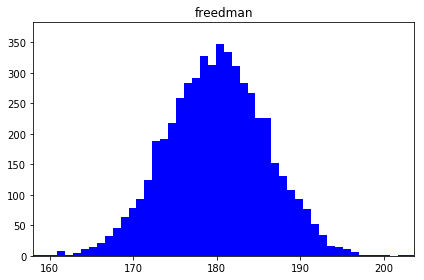

In [10]:
middle_sized = np.random.normal(180, 6, 5000)

for n in ["blocks", "scott", "knuth", "freedman"]:
    algo = "{0}".format(n)
    hist = histogram(middle_sized, algo, name=algo)
    hist.plot(density=True)